In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('Local_Area_Unemployment_Statistics__Beginning_1976.csv')

In [4]:
dates = data.apply(lambda x: pd.Timestamp('%d-%d-01' % (x.Year, x.Month)), axis=1)
d = pd.concat((data,pd.DataFrame({'date':dates})), axis=1)
d = d.sort_values(by='date')
d[:5]

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,date
493,New York State,1976,1,7634700,6780200,854400,11.2%,1976-01-01
41569,BALANCE OF STATE,1976,1,4520500,4023100,497400,11.0%,1976-01-01
39039,New York City,1976,1,3114200,2757200,357000,11.5%,1976-01-01
23846,New York City Region,1976,1,3114200,2757200,357000,11.5%,1976-01-01
23847,New York City Region,1976,2,3125100,2762400,362700,11.6%,1976-02-01


In [5]:
# Get different areas
nyc = d[d.Area == 'New York City']
nys = d[d.Area == 'New York State']
buf = d[d.Area == 'Buffalo City']

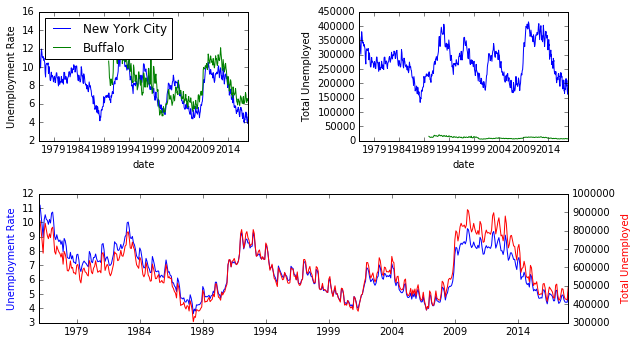

In [16]:
# Grid subplot with subplot2grid
plt.subplot2grid((2,2), (0, 0))
plt.plot(nyc.date, 100*nyc['Unemployed']/nyc['Labor Force'], label='New York City')
plt.plot(buf.date, 100*buf['Unemployed']/buf['Labor Force'], label='Buffalo')
plt.xlabel('date')
plt.ylabel('Unemployment Rate')
plt.legend(loc='best')
plt.subplot2grid((2,2), (0, 1))
plt.plot(nyc.date, nyc['Unemployed'])
plt.plot(buf.date, buf['Unemployed'])
plt.xlabel('date')
plt.ylabel('Total Unemployed')
plt.subplot2grid((2,2), (1, 0), colspan=2)
plt.plot(nys.date, 100*nys['Unemployed']/nys['Labor Force'], label='New York State')
plt.ylabel('Unemployment Rate', color='b')
plt.twinx()
plt.plot(nys.date, nys['Unemployed'], color='r')
plt.ylabel('Total Unemployed', color='r')
plt.xlabel('date')
plt.tight_layout()
plt.gcf().set_size_inches(10,5)